In [1]:
#to install any packages/modules via jupytrer notebook (!pip install package_name)
# !pip install pandas
# !pip install bs4
!pip install selenium

In [2]:
import pandas as pd#collect data
from string import ascii_uppercase as alpha#link alph n num
import pickle#export dict file
from bs4 import BeautifulSoup#scrape data
import requests#to req data from a web
import lxml#parser 

#statistical implementations:

import math
import statistics
import numpy as np
import scipy.stats


In [3]:
d=pd.read_html('https://en.wikipedia.org/wiki/2022_FIFA_World_Cup')

In [4]:
#all the tables are displayes but we no need all the table for our prediction system
d

[   كأس العالم لكرة القدم 2022 Kaʾs al-ʿālam li-kurat al-qadam 2022  \
 0   .mw-parser-output .script-arabic{font-family:"...                
 1                                  Tournament details                
 2                                        Host country                
 3                                               Dates                
 4                                               Teams                
 5                                            Venue(s)                
 6                                     Final positions                
 7                                           Champions                
 8                                          Runners-up                
 9                                         Third place                
 10                                       Fourth place                
 11                              Tournament statistics                
 12                                     Matches played                
 13   

In [5]:
#to find the required table check for each index of the table and extract the tables needed for analysis
#to find which team is the winner we must collect the tables that has data of matches held between two teams(ex:group a,group b,etc..)
d[9]#Group A
d[16]#Group B
d[23]#Group c
#pattern-each group table present in the index with diference of 7
#we need till last table Group H
d[58]

,Pos,Teamvte,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,1,Portugal,3,2,0,1,6,4,+2,6,Advanced to knockout stage
1,2,South Korea,3,1,1,1,4,4,0,4,Advanced to knockout stage
2,3,Uruguay,3,1,1,1,2,2,0,4,NaN
3,4,Ghana,3,1,0,2,5,7,−2,3,NaN


In [6]:
#customize the table as per the need
#rename the teamvte as team
#delete qualification col(unwanted data)
#to bring change in alll the tables(Group x) we use for loop

In [7]:
for i in range(9,65,7):#range(start,end,skip)
    print(i)#print all Group tables index

9
16
23
30
37
44
51
58


In [8]:
#to link this number to the table we need we use another library ascii from string
alpha
#this helps us to give name as group a b c for our tables rather than the numbers

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [9]:
for letter,i in zip(alpha,range(9,65,7)):#zip is a func used here to link letters with numbers
    print(letter,i)

A 9
B 16
C 23
D 30
E 37
F 44
G 51
H 58


In [10]:
#successfully linked letters with numbers
#now clean,rename the data in the required tables and create a dataframe df
d=pd.read_html('https://en.wikipedia.org/wiki/2022_FIFA_World_Cup')

dict_table={}#create dictionary
for letter,i in zip(alpha,range(9,65,7)):
    df=d[i]
    df.rename(columns={'Teamvte':'Team'},inplace=True)#rename
    df.pop('Qualification')#delete unwanted data
    dict_table[f'Group {letter}']=df #we use f to use variable respective for numbers
                                    #ex:group A/B/C/D/E/F/G/H

In [11]:
#sometimes all the tables we need do not have same column name
#(ex:teamvte)in that case we can change the column name 
#df.rename(columns={df.columns[1]:'Teams'},inplace=True)
d[9]#column name changed

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Netherlands,3,2,1,0,5,1,+4,7
1,2,Senegal,3,2,0,1,5,4,+1,6
2,3,Ecuador,3,1,1,1,4,3,+1,4
3,4,Qatar (H),3,0,0,3,1,7,−6,0


In [12]:
dict_table['Group A']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Netherlands,3,2,1,0,5,1,+4,7
1,2,Senegal,3,2,0,1,5,4,+1,6
2,3,Ecuador,3,1,1,1,4,3,+1,4
3,4,Qatar (H),3,0,0,3,1,7,−6,0


In [13]:
dict_table['Group B']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,England,3,2,1,0,9,2,+7,7
1,2,United States,3,1,2,0,2,1,+1,5
2,3,Iran,3,1,0,2,4,7,−3,3
3,4,Wales,3,0,1,2,1,6,−5,1


In [14]:
dict_table['Group C']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Argentina,3,2,0,1,5,2,+3,6
1,2,Poland,3,1,1,1,2,2,0,4
2,3,Mexico,3,1,1,1,2,3,−1,4
3,4,Saudi Arabia,3,1,0,2,3,5,−2,3


In [15]:
dict_table['Group D']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,France,3,2,0,1,6,3,+3,6
1,2,Australia,3,2,0,1,3,4,−1,6
2,3,Tunisia,3,1,1,1,1,1,0,4
3,4,Denmark,3,0,1,2,1,3,−2,1


In [16]:
dict_table['Group E']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Japan,3,2,0,1,4,3,+1,6
1,2,Spain,3,1,1,1,9,3,+6,4
2,3,Germany,3,1,1,1,6,5,+1,4
3,4,Costa Rica,3,1,0,2,3,11,−8,3


In [17]:
dict_table['Group F']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Morocco,3,2,1,0,4,1,+3,7
1,2,Croatia,3,1,2,0,4,1,+3,5
2,3,Belgium,3,1,1,1,1,2,−1,4
3,4,Canada,3,0,0,3,2,7,−5,0


In [18]:
dict_table['Group G']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Brazil,3,2,0,1,3,1,+2,6
1,2,Switzerland,3,2,0,1,4,3,+1,6
2,3,Cameroon,3,1,1,1,4,4,0,4
3,4,Serbia,3,0,1,2,5,8,−3,1


In [19]:
dict_table['Group H']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Portugal,3,2,0,1,6,4,+2,6
1,2,South Korea,3,1,1,1,4,4,0,4
2,3,Uruguay,3,1,1,1,2,2,0,4
3,4,Ghana,3,1,0,2,5,7,−2,3


In [20]:
#we use pickle to use the dictionary in various files
with open ('dict_table','wb') as output:
    pickle.dump(dict_table,output)
#we have dumped all the data of dict-table to the file output

In [21]:
#scrape all the data of all fifa worldcups (1930-2018) to predict winner 2022
# step 1: web scraping
#python library-Beautifulsoup

In [22]:
years=[1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,1978,1982,1986,1990,1994,1998,2002,2006,2010,2014,2018,]
#list represent all world cup matches
#to scrape data use beautifulsoup(bs4)

In [23]:
#create a function to get data from all the years in the above list
def get_matches(year):
    web=f"https://en.wikipedia.org/wiki/{year}_FIFA_World_Cup"#use req library to req from web
    response=requests.get(web)#result of our req is stored in response
    content=response.text#store response output to variable content
    # content will be parsed using a parser lxml
    soup= BeautifulSoup(content,'lxml')
    #to get all the content from web use find or findall
    # syntax- soup.find_all('tag',class_='name')
    #pattern-<div itemscope itemtype="http://schema.org/SportsEvent" class="footballbox">…</div>
    #this pattern used to acces all the rows that has match details
    matches=soup.find_all('div', class_='footballbox')
    
     #put the data into Table using pandas
     #before that create 3 list for 3 types of data we scraped so far
    home=[]
    score=[]
    away=[]
    for match in matches:
        home.append(match.find('th', class_='fhome').get_text())
        score.append(match.find('th',class_='fscore').get_text())
        away.append(match.find('th', class_='faway').get_text())
 #create a dictionary
 #before that create a dataframe to org our data
    dict_football={'home':home,'score':score,'away':away}
    df_football=pd.DataFrame(dict_football)
 #create a new column to store the year of the matches(ex:2014,1930,2018 etc...)
    df_football['year']=year
    return df_football

#function is working fine still we cannot extract all data from all the years due to some mismatch in patterns of some year
#ex:change in tag or classname
#in that case we can go for different approach

# we concatenate all the data into one dataframe(df_fifa) and convert ot to csv
fifa=[get_matches(year) for year in years]
df_fifa = pd.concat(fifa)#join all the dataframes/tables
df_fifa.to_csv('fifa_worldcup_historical_data.csv',index=False)#index values of df
 

#to access data of match that does not happen(to be predicted)
#fixture
df_fixture= get_matches(2022)
df_fixture.to_csv('fifa_worldcup_fixture.csv',index=False)

#successfully scraped all the required data in an organised manner

In [24]:
print(get_matches('2018'))

        home         score           away  year
0    Russia            5–0   Saudi Arabia  2018
1     Egypt            0–1        Uruguay  2018
2    Russia            3–1          Egypt  2018
3   Uruguay            1–0   Saudi Arabia  2018
4   Uruguay            3–0         Russia  2018
..       ...           ...            ...   ...
59   Russia   2–2 (a.e.t.)        Croatia  2018
60   France            1–0        Belgium  2018
61  Croatia   2–1 (a.e.t.)        England  2018
62  Belgium            2–0        England  2018
63   France            4–2        Croatia  2018

[64 rows x 4 columns]


In [25]:
#to get the missing data from the web use selenium 

In [26]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time
import pandas as pd

path = "C:\Windows\chromedriver.exe"
service = Service(executable_path=path)
driver = webdriver.Chrome(service=service)


def get_misssing_data(year):
    web = f'https://en.wikipedia.org/wiki/{year}_FIFA_World_Cup'

    driver.get(web)#a new window will pop with the web link
    #to locate the path with selenium create a xpath for missing data
    #syntax- tagname[@AttributeName="Value"]
    matches = driver.find_elements(by='xpath', value='//td[@align="right"]/.. | //td[@style="text-align:right;"]/..')
    # matches = driver.find_elements(by='xpath', value='//tr[@style="font-size:90%"]')

    home = []
    score = []
    away = []
    
    
    for match in matches:
        home.append(match.find_element(by='xpath', value='./td[1]').text)
        score.append(match.find_element(by='xpath', value='./td[2]').text)
        away.append(match.find_element(by='xpath', value='./td[3]').text)

    dict_football = {'home': home, 'score': score, 'away': away}
    df_football = pd.DataFrame(dict_football)
    df_football['year'] = year
    time.sleep(2)
    return df_football


years = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974,
         1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014,
         2018]

fifa = [get_misssing_data(year) for year in years]
driver.quit()
df_fifa = pd.concat(fifa, ignore_index=True)
df_fifa.to_csv("fifa_worldcup_missing_data.csv", index=False)

In [27]:
#data cleaning using pandas
df_historical_data = pd.read_csv('fifa_worldcup_fixture.csv')
df_fixture=pd.read_csv('fifa_worldcup_fixture.csv')
df_missing_data=pd.read_csv('fifa_worldcup_missing_data.csv')

In [28]:
df_historical_data

,home,score,away,year
0,Qatar,0–2,Ecuador,2022
1,Senegal,0–2,Netherlands,2022
2,Qatar,1–3,Senegal,2022
3,Netherlands,1–1,Ecuador,2022
4,Ecuador,1–2,Senegal,2022
...,...,...,...,...
59,England,1–2,France,2022
60,Argentina,3–0,Croatia,2022
61,France,2–0,Morocco,2022
62,Croatia,2–1,Morocco,2022


In [29]:
df_fixture

,home,score,away,year
0,Qatar,0–2,Ecuador,2022
1,Senegal,0–2,Netherlands,2022
2,Qatar,1–3,Senegal,2022
3,Netherlands,1–1,Ecuador,2022
4,Ecuador,1–2,Senegal,2022
...,...,...,...,...
59,England,1–2,France,2022
60,Argentina,3–0,Croatia,2022
61,France,2–0,Morocco,2022
62,Croatia,2–1,Morocco,2022


In [30]:
df_missing_data

,home,score,away,year
0,Italy,1–0,Austria,1990
1,United States,1–5,Czechoslovakia,1990
2,Italy,1–0,United States,1990
3,Austria,0–1,Czechoslovakia,1990
4,Italy,2–0,Czechoslovakia,1990
...,...,...,...,...
95,NaN,NaN,NaN,2010
96,NaN,NaN,NaN,2010
97,NaN,NaN,NaN,2010
98,NaN,NaN,NaN,2010


In [31]:
#cleaning df_fixture
df_fixture['home'] = df_fixture['home'].str.strip()
df_fixture['away'] = df_fixture['away'].str.strip()
#get rid of trialing and leading spaces


#Cleaning df_missing_data and adding it to df_historical_data

#missing data file has some null values
df_missing_data[df_missing_data['home'].isnull()]

,home,score,away,year
36,NaN,NaN,NaN,2010
37,NaN,NaN,NaN,2010
38,NaN,NaN,NaN,2010
39,NaN,NaN,NaN,2010
40,NaN,NaN,NaN,2010
...,...,...,...,...
95,NaN,NaN,NaN,2010
96,NaN,NaN,NaN,2010
97,NaN,NaN,NaN,2010
98,NaN,NaN,NaN,2010


In [32]:
#drop null 
df_missing_data.dropna(inplace=True)


#no null
df_missing_data[df_missing_data['home'].isnull()]

,home,score,away,year


In [33]:
#concatenate dfs and clean
df_historical_data = pd.concat([df_historical_data, df_missing_data], ignore_index=True)
#droping duplicates if have any
df_historical_data.drop_duplicates(inplace=True)
#sort dfs based on years
df_historical_data.sort_values('year', inplace=True)
df_historical_data

,home,score,away,year
99,Republic of Ireland,1–1,Netherlands,1990
78,Brazil,1–0,Costa Rica,1990
77,Costa Rica,1–0,Scotland,1990
76,Brazil,2–1,Sweden,1990
75,Cameroon,0–4,Soviet Union,1990
...,...,...,...,...
28,Japan,2–1,Spain,2022
27,Spain,1–1,Germany,2022
26,Japan,0–1,Costa Rica,2022
24,Germany,1–2,Japan,2022


In [34]:
#cleaning historical data
#walkover team
delete_index = df_historical_data[df_historical_data['home'].str.contains('Sweden') &
                                  df_historical_data['away'].str.contains('Austria')].index

df_historical_data.drop(index=delete_index, inplace=True)


df_historical_data[df_historical_data['home'].str.contains('Sweden') &
                                  df_historical_data['away'].str.contains('Austria')].index
#deleted the row

Index([], dtype='int64')

In [35]:
df_historical_data

,home,score,away,year
99,Republic of Ireland,1–1,Netherlands,1990
78,Brazil,1–0,Costa Rica,1990
77,Costa Rica,1–0,Scotland,1990
76,Brazil,2–1,Sweden,1990
75,Cameroon,0–4,Soviet Union,1990
...,...,...,...,...
28,Japan,2–1,Spain,2022
27,Spain,1–1,Germany,2022
26,Japan,0–1,Costa Rica,2022
24,Germany,1–2,Japan,2022


In [36]:
# cleanning score and home/away columns
df_historical_data['score'] = df_historical_data['score'].str.replace('[^\d–]', '', regex=True)
df_historical_data['home'] = df_historical_data['home'].str.strip() # clean blank spaces: Yugoslavia twice
df_historical_data['away'] = df_historical_data['away'].str.strip()

In [37]:
df_historical_data

,home,score,away,year
99,Republic of Ireland,1–1,Netherlands,1990
78,Brazil,1–0,Costa Rica,1990
77,Costa Rica,1–0,Scotland,1990
76,Brazil,2–1,Sweden,1990
75,Cameroon,0–4,Soviet Union,1990
...,...,...,...,...
28,Japan,2–1,Spain,2022
27,Spain,1–1,Germany,2022
26,Japan,0–1,Costa Rica,2022
24,Germany,1–2,Japan,2022


In [38]:
# splitting score columns into home and away goals and dropping score column
df_historical_data[['HomeGoals', 'AwayGoals']] = df_historical_data['score'].str.split('–', expand=True)
df_historical_data.drop('score', axis=1, inplace=True)


In [39]:
df_historical_data

,home,away,year,HomeGoals,AwayGoals
99,Republic of Ireland,Netherlands,1990,1,1
78,Brazil,Costa Rica,1990,1,0
77,Costa Rica,Scotland,1990,1,0
76,Brazil,Sweden,1990,2,1
75,Cameroon,Soviet Union,1990,0,4
...,...,...,...,...,...
28,Japan,Spain,2022,2,1
27,Spain,Germany,2022,1,1
26,Japan,Costa Rica,2022,0,1
24,Germany,Japan,2022,1,2


In [40]:
# renaming columns and changing data types
df_historical_data.rename(columns={'home': 'HomeTeam', 'away': 'AwayTeam', 
                                   'year':'Year'}, inplace=True)
df_historical_data = df_historical_data.astype({'HomeGoals': int, 'AwayGoals':int, 'Year': int})

In [41]:
# creating new column "totalgoals"
df_historical_data['TotalGoals'] = df_historical_data['HomeGoals'] + df_historical_data['AwayGoals']
df_historical_data

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
99,Republic of Ireland,Netherlands,1990,1,1,2
78,Brazil,Costa Rica,1990,1,0,1
77,Costa Rica,Scotland,1990,1,0,1
76,Brazil,Sweden,1990,2,1,3
75,Cameroon,Soviet Union,1990,0,4,4
...,...,...,...,...,...,...
28,Japan,Spain,2022,2,1,3
27,Spain,Germany,2022,1,1,2
26,Japan,Costa Rica,2022,0,1,1
24,Germany,Japan,2022,1,2,3


In [42]:
df_historical_data.dtypes

HomeTeam      object
AwayTeam      object
Year           int32
HomeGoals      int32
AwayGoals      int32
TotalGoals     int32
dtype: object

In [43]:
# # #exporting clean df
df_historical_data.to_csv('clean_fifa_worldcup_matches.csv',index=False)
df_fixture.to_csv('clean_fifa_worldcup_fixture.csv',index=False)

In [44]:
#stat imp

df_historical_data

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
99,Republic of Ireland,Netherlands,1990,1,1,2
78,Brazil,Costa Rica,1990,1,0,1
77,Costa Rica,Scotland,1990,1,0,1
76,Brazil,Sweden,1990,2,1,3
75,Cameroon,Soviet Union,1990,0,4,4
...,...,...,...,...,...,...
28,Japan,Spain,2022,2,1,3
27,Spain,Germany,2022,1,1,2
26,Japan,Costa Rica,2022,0,1,1
24,Germany,Japan,2022,1,2,3


In [45]:
df_historical_data.iloc[5]

HomeTeam      Cameroon
AwayTeam       Romania
Year              1990
HomeGoals            2
AwayGoals            1
TotalGoals           3
Name: 73, dtype: object

In [46]:
df_historical_data.loc[5]

HomeTeam      Netherlands
AwayTeam            Qatar
Year                 2022
HomeGoals               2
AwayGoals               0
TotalGoals              2
Name: 5, dtype: object

In [47]:
df_historical_data.iloc[-5]

HomeTeam      Japan
AwayTeam      Spain
Year           2022
HomeGoals         2
AwayGoals         1
TotalGoals        3
Name: 28, dtype: object

In [48]:
df_historical_data['Year']

99    1990
78    1990
77    1990
76    1990
75    1990
      ... 
28    2022
27    2022
26    2022
24    2022
49    2022
Name: Year, Length: 100, dtype: int32

In [49]:
df_historical_data['TotalGoals']

99    2
78    1
77    1
76    3
75    4
     ..
28    3
27    2
26    1
24    3
49    3
Name: TotalGoals, Length: 100, dtype: int32

In [50]:
df_historical_data.head()

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
99,Republic of Ireland,Netherlands,1990,1,1,2
78,Brazil,Costa Rica,1990,1,0,1
77,Costa Rica,Scotland,1990,1,0,1
76,Brazil,Sweden,1990,2,1,3
75,Cameroon,Soviet Union,1990,0,4,4


In [51]:
df_historical_data.tail()

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
28,Japan,Spain,2022,2,1,3
27,Spain,Germany,2022,1,1,2
26,Japan,Costa Rica,2022,0,1,1
24,Germany,Japan,2022,1,2,3
49,Argentina,Australia,2022,2,1,3


In [52]:
df_historical_data.describe()

,Year,HomeGoals,AwayGoals,TotalGoals
count,100.000000,100.000000,100.000000,100.000000
mean,2010.480000,1.460000,1.080000,2.540000
std,15.437381,1.438433,1.088786,1.788967
min,1990.000000,0.000000,0.000000,0.000000
25%,1990.000000,0.000000,0.000000,1.000000
50%,2022.000000,1.000000,1.000000,2.000000
75%,2022.000000,2.000000,2.000000,3.000000
max,2022.000000,7.000000,5.000000,8.000000


In [53]:
df_historical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 99 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   HomeTeam    100 non-null    object
 1   AwayTeam    100 non-null    object
 2   Year        100 non-null    int32 
 3   HomeGoals   100 non-null    int32 
 4   AwayGoals   100 non-null    int32 
 5   TotalGoals  100 non-null    int32 
dtypes: int32(4), object(2)
memory usage: 8.0+ KB


In [54]:
#to find missing values
df_historical_data.isna()

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
99,False,False,False,False,False,False
78,False,False,False,False,False,False
77,False,False,False,False,False,False
76,False,False,False,False,False,False
75,False,False,False,False,False,False
...,...,...,...,...,...,...
28,False,False,False,False,False,False
27,False,False,False,False,False,False
26,False,False,False,False,False,False
24,False,False,False,False,False,False


In [55]:
df_historical_data.Year.head()

99    1990
78    1990
77    1990
76    1990
75    1990
Name: Year, dtype: int32

In [56]:
df_historical_data.Year.tail()

28    2022
27    2022
26    2022
24    2022
49    2022
Name: Year, dtype: int32

In [57]:
df_historical_data.dropna()

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
99,Republic of Ireland,Netherlands,1990,1,1,2
78,Brazil,Costa Rica,1990,1,0,1
77,Costa Rica,Scotland,1990,1,0,1
76,Brazil,Sweden,1990,2,1,3
75,Cameroon,Soviet Union,1990,0,4,4
...,...,...,...,...,...,...
28,Japan,Spain,2022,2,1,3
27,Spain,Germany,2022,1,1,2
26,Japan,Costa Rica,2022,0,1,1
24,Germany,Japan,2022,1,2,3


In [58]:
df_historical_data

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
99,Republic of Ireland,Netherlands,1990,1,1,2
78,Brazil,Costa Rica,1990,1,0,1
77,Costa Rica,Scotland,1990,1,0,1
76,Brazil,Sweden,1990,2,1,3
75,Cameroon,Soviet Union,1990,0,4,4
...,...,...,...,...,...,...
28,Japan,Spain,2022,2,1,3
27,Spain,Germany,2022,1,1,2
26,Japan,Costa Rica,2022,0,1,1
24,Germany,Japan,2022,1,2,3


In [59]:
#data vsualisation

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('clean_fifa_worldcup_matches.csv')

In [62]:
df

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,Republic of Ireland,Netherlands,1990,1,1,2
1,Brazil,Costa Rica,1990,1,0,1
2,Costa Rica,Scotland,1990,1,0,1
3,Brazil,Sweden,1990,2,1,3
4,Cameroon,Soviet Union,1990,0,4,4
...,...,...,...,...,...,...
95,Japan,Spain,2022,2,1,3
96,Spain,Germany,2022,1,1,2
97,Japan,Costa Rica,2022,0,1,1
98,Germany,Japan,2022,1,2,3


In [63]:
#to ignore that warnings red boxes during output
import warnings
warnings.filterwarnings('ignore')

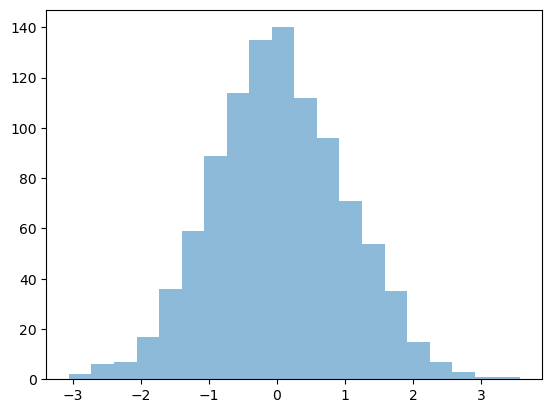

In [64]:
#histogram
a=np.random.normal(size=1000)
plt.hist(a,bins=20,alpha=0.5)
plt.show()

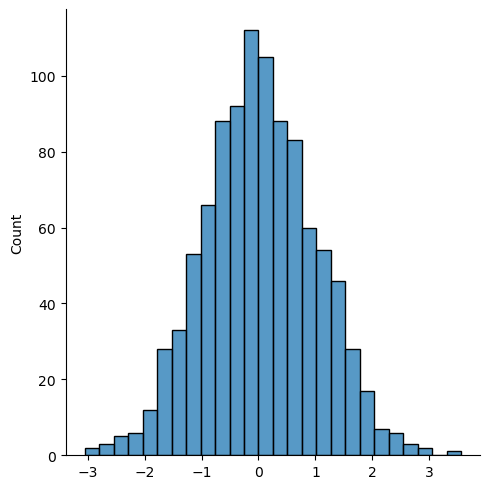

In [65]:
#mistakenly used keyword but some op came
sns.displot(a)

<Axes: ylabel='Density'>

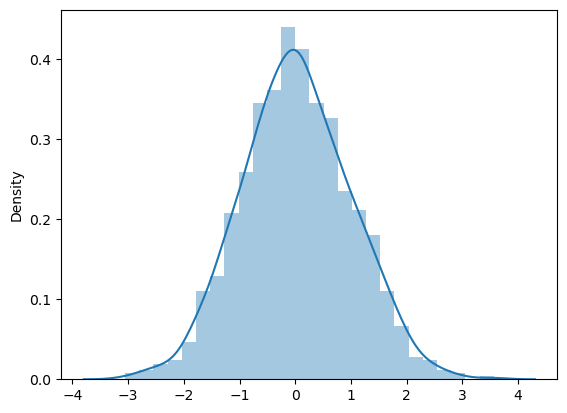

In [66]:
sns.distplot(a)

<Axes: >

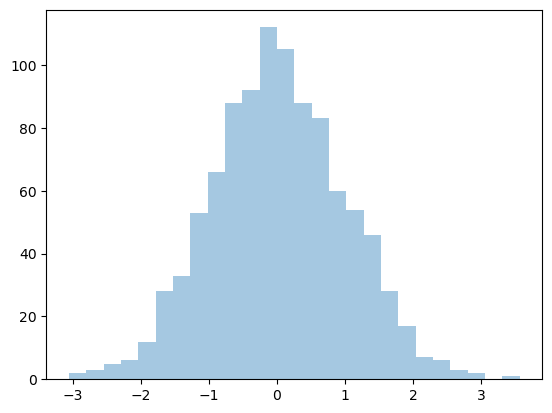

In [67]:
#sns=seaborn,kde=kernal density estimation
sns.distplot(a,kde=False)

<Axes: ylabel='Density'>

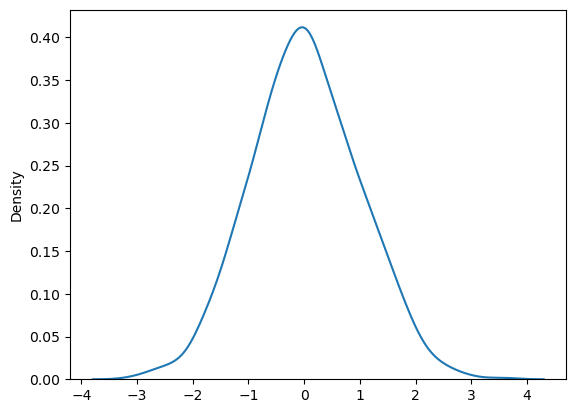

In [68]:
sns.kdeplot(a)

<Axes: >

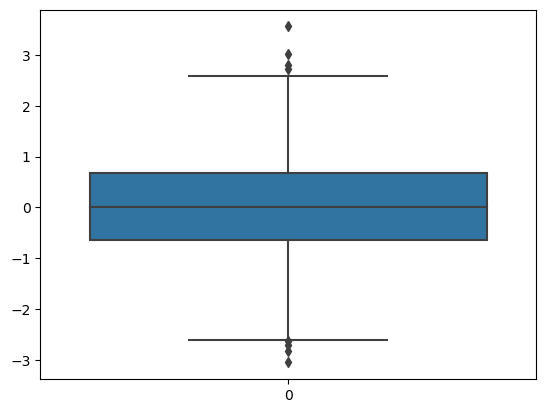

In [69]:
#boxplot
sns.boxplot(a)
#bottom to up min 25% median(50%) 75% max (that dots-outliers)

In [70]:
#till above they work on continuous data
#below work on dicrete data

<Axes: ylabel='Density'>

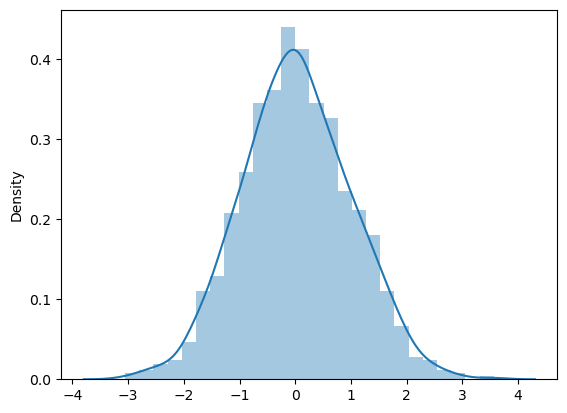

In [71]:
sns.distplot(a)

<Axes: >

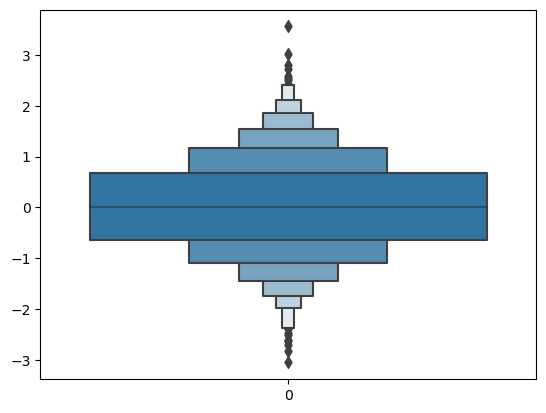

In [72]:
#boxenplot
sns.boxenplot(a)

<Axes: >

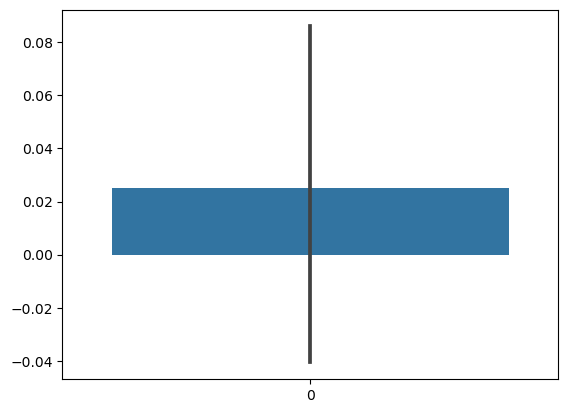

In [73]:
#barplot
sns.barplot(a)
#output is not proper data representation
#so we introduce for the topic variant analysis

In [74]:
# barplot-bivariant
# others-univariant

In [75]:
df = pd.read_csv(r"clean_fifa_worldcup_matches.csv")
print(df.head())

              HomeTeam      AwayTeam  Year  HomeGoals  AwayGoals  TotalGoals
0  Republic of Ireland   Netherlands  1990          1          1           2
1               Brazil    Costa Rica  1990          1          0           1
2           Costa Rica      Scotland  1990          1          0           1
3               Brazil        Sweden  1990          2          1           3
4             Cameroon  Soviet Union  1990          0          4           4


In [76]:
df

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,Republic of Ireland,Netherlands,1990,1,1,2
1,Brazil,Costa Rica,1990,1,0,1
2,Costa Rica,Scotland,1990,1,0,1
3,Brazil,Sweden,1990,2,1,3
4,Cameroon,Soviet Union,1990,0,4,4
...,...,...,...,...,...,...
95,Japan,Spain,2022,2,1,3
96,Spain,Germany,2022,1,1,2
97,Japan,Costa Rica,2022,0,1,1
98,Germany,Japan,2022,1,2,3


In [77]:
df.values

array([['Republic of Ireland', 'Netherlands', 1990, 1, 1, 2],
       ['Brazil', 'Costa Rica', 1990, 1, 0, 1],
       ['Costa Rica', 'Scotland', 1990, 1, 0, 1],
       ['Brazil', 'Sweden', 1990, 2, 1, 3],
       ['Cameroon', 'Soviet Union', 1990, 0, 4, 4],
       ['Cameroon', 'Romania', 1990, 2, 1, 3],
       ['Argentina', 'Soviet Union', 1990, 2, 0, 2],
       ['Sweden', 'Scotland', 1990, 1, 2, 3],
       ['Soviet Union', 'Romania', 1990, 0, 2, 2],
       ['Austria', 'United States', 1990, 2, 1, 3],
       ['Italy', 'Czechoslovakia', 1990, 2, 0, 2],
       ['Austria', 'Czechoslovakia', 1990, 0, 1, 1],
       ['Italy', 'United States', 1990, 1, 0, 1],
       ['United States', 'Czechoslovakia', 1990, 1, 5, 6],
       ['Italy', 'Austria', 1990, 1, 0, 1],
       ['Argentina', 'Cameroon', 1990, 0, 1, 1],
       ['Brazil', 'Scotland', 1990, 1, 0, 1],
       ['Argentina', 'Romania', 1990, 1, 1, 2],
       ['United Arab Emirates', 'Colombia', 1990, 0, 2, 2],
       ['Republic of Ireland', 'Egy

<Axes: >

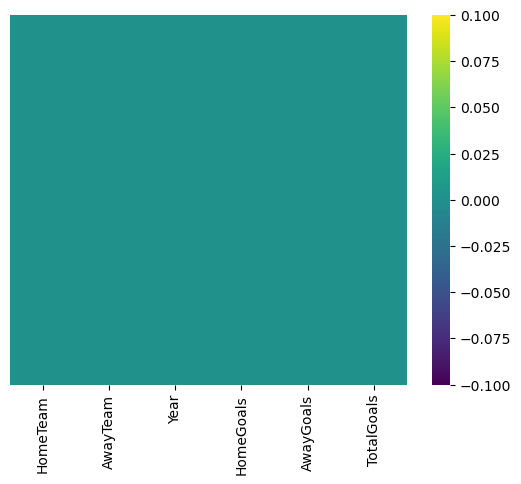

In [78]:
#visualising total null values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

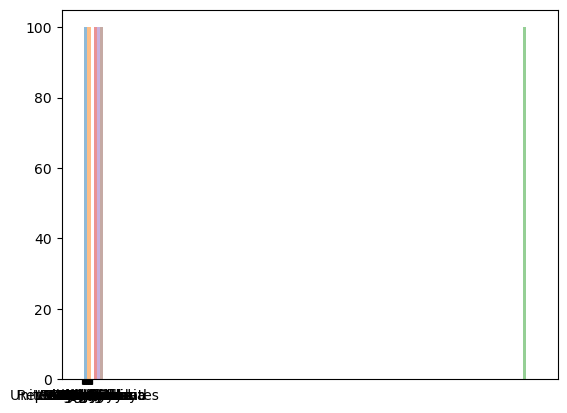

In [79]:
#draw all the charts
#histogram
#df=np.random.normal(size=1000)
plt.hist(df,bins=20,alpha=0.5)
plt.show()

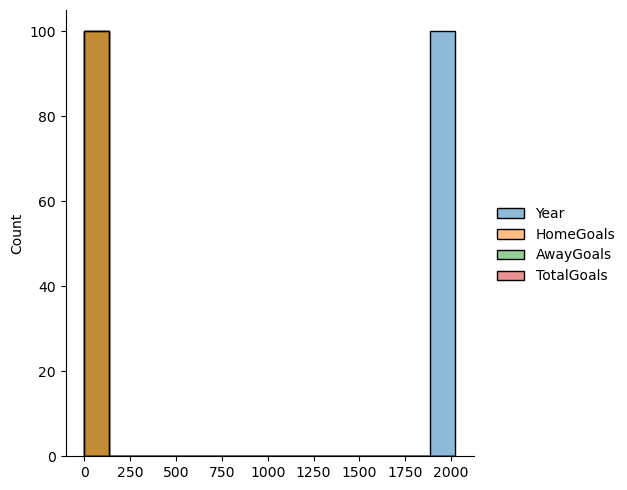

In [80]:
sns.displot(df)

<Axes: ylabel='Density'>

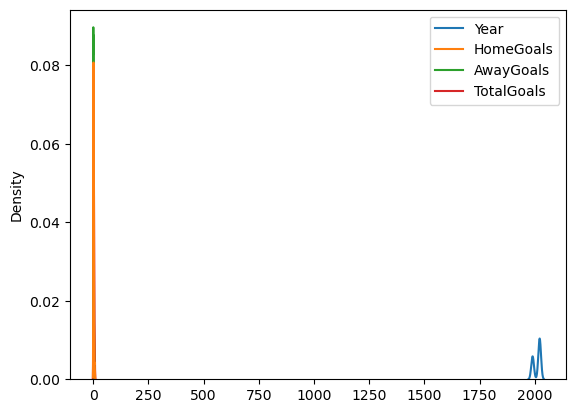

In [81]:
sns.kdeplot(df)

<Axes: >

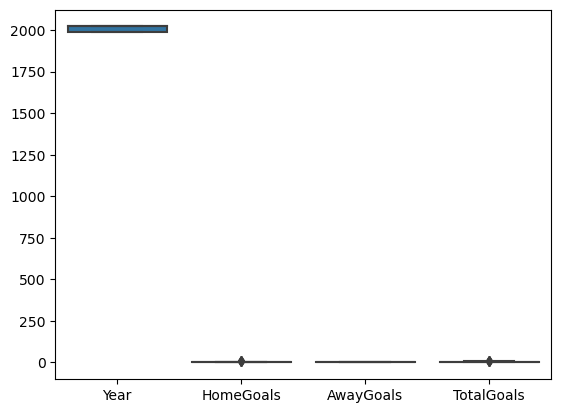

In [82]:
sns.boxplot(df)

In [83]:
df.mode()

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,Argentina,Spain,2022.0,1.0,0.0,2.0
1,NaN,United States,NaN,NaN,NaN,NaN


In [84]:
df.mean()

TypeError: Could not convert ['Republic of IrelandBrazilCosta RicaBrazilCameroonCameroonArgentinaSwedenSoviet UnionAustriaItalyAustriaItalyUnited StatesItalyArgentinaBrazilArgentinaUnited Arab EmiratesRepublic of IrelandSwedenNetherlandsEnglandSouth KoreaBelgiumSouth KoreaBelgiumEnglandBelgiumUruguayWest GermanyYugoslaviaEnglandWest GermanyYugoslaviaWest GermanyEnglandJapanBrazilMoroccoPortugalCroatiaNetherlandsEnglandFranceFranceCroatiaArgentinaMoroccoArgentinaQatarSouth KoreaFranceTunisiaFranceDenmarkSaudi ArabiaPolandArgentinaPolandMexicoArgentinaIranWalesEnglandWalesUnited StatesEnglandNetherlandsEcuadorNetherlandsQatarSenegalAustraliaNetherlandsTunisiaSpainGhanaPortugalSouth KoreaPortugalUruguayCameroonSerbiaBrazilCameroonBrazilSwitzerlandCanadaCroatiaCroatiaBelgiumBelgiumMoroccoCosta RicaJapanSpainJapanGermanyArgentina'
 'NetherlandsCosta RicaScotlandSwedenSoviet UnionRomaniaSoviet UnionScotlandRomaniaUnited StatesCzechoslovakiaCzechoslovakiaUnited StatesCzechoslovakiaAustriaCameroonScotlandRomaniaColombiaEgyptCosta RicaEgyptRepublic of IrelandUruguaySpainSpainUruguayNetherlandsSouth KoreaSpainYugoslaviaColombiaEgyptColombiaUnited Arab EmiratesUnited Arab EmiratesSenegalCroatiaSouth KoreaSpainSwitzerlandBrazilArgentinaFrancePolandMoroccoMoroccoFrancePortugalCroatiaEcuadorPortugalDenmarkAustraliaAustraliaTunisiaMexicoArgentinaMexicoSaudi ArabiaPolandSaudi ArabiaUnited StatesEnglandUnited StatesIranWalesIranQatarSenegalEcuadorSenegalNetherlandsDenmarkUnited StatesFranceCosta RicaUruguayUruguayGhanaGhanaSouth KoreaBrazilSwitzerlandSwitzerlandSerbiaSerbiaCameroonMoroccoBelgiumCanadaMoroccoCanadaCroatiaGermanySpainGermanyCosta RicaJapanAustralia'] to numeric

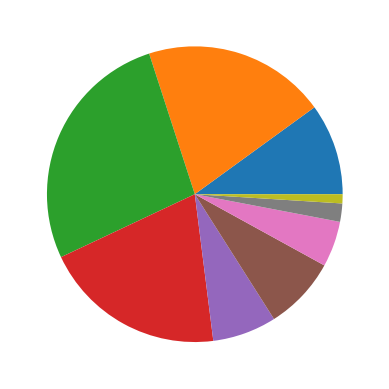

In [85]:
#pie chart
e=df.groupby('TotalGoals')['TotalGoals'].count()
plt.pie(e)
plt.show()

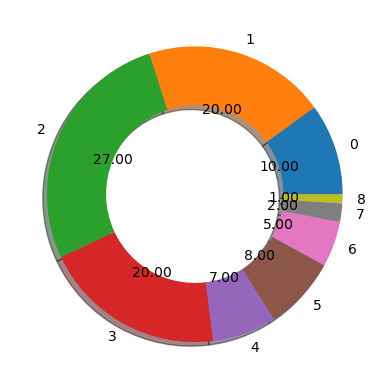

In [86]:
#donut chart
plt.pie(e,labels=e.index,autopct="%.2f",shadow=True,wedgeprops=dict(width=0.4))
plt.show()

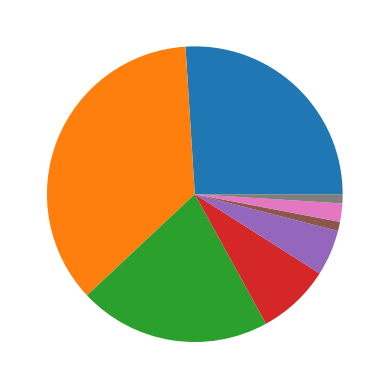

In [87]:
#pie chart
e=df.groupby('HomeGoals')['AwayGoals'].count()
plt.pie(e)
plt.show()

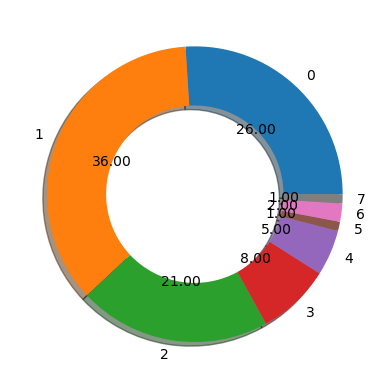

In [88]:
#donut chart
plt.pie(e,labels=e.index,autopct="%.2f",shadow=True,wedgeprops=dict(width=0.4))
plt.show()

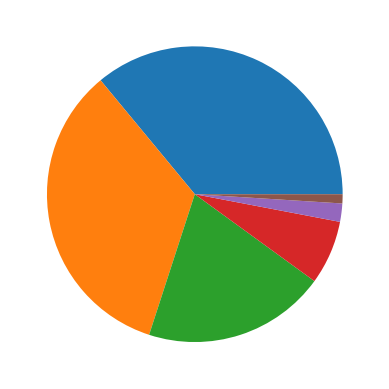

In [89]:
#pie chart
e=df.groupby('AwayGoals')['AwayGoals'].count()
plt.pie(e)
plt.show()

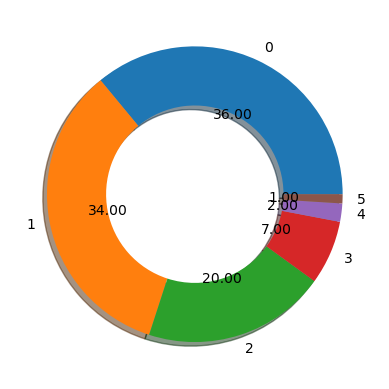

In [90]:
#donut chart
plt.pie(e,labels=e.index,autopct="%.2f",shadow=True,wedgeprops=dict(width=0.4))
plt.show()

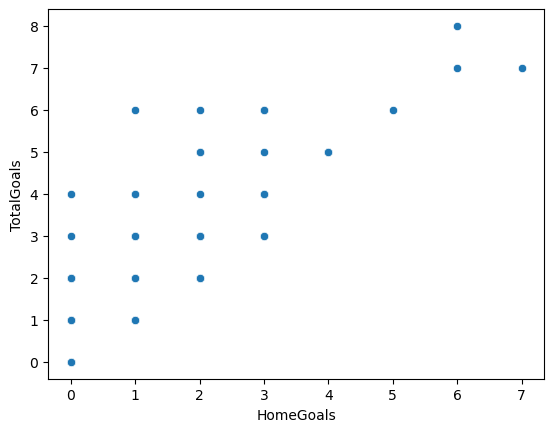

In [91]:
#scatterplot() most used chart
sns.scatterplot(x='HomeGoals',y='TotalGoals',data=df)
plt.show()

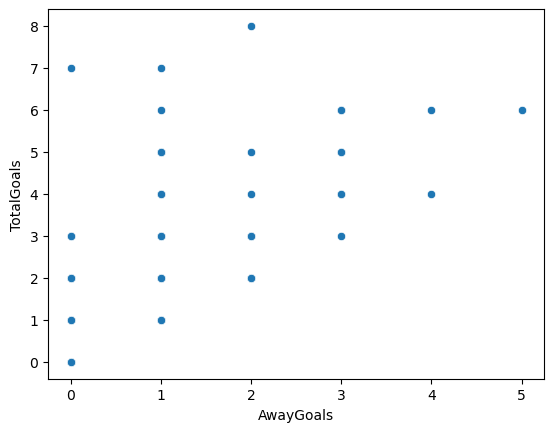

In [92]:
#scatterplot() most used chart
sns.scatterplot(x='AwayGoals',y='TotalGoals',data=df)
plt.show()

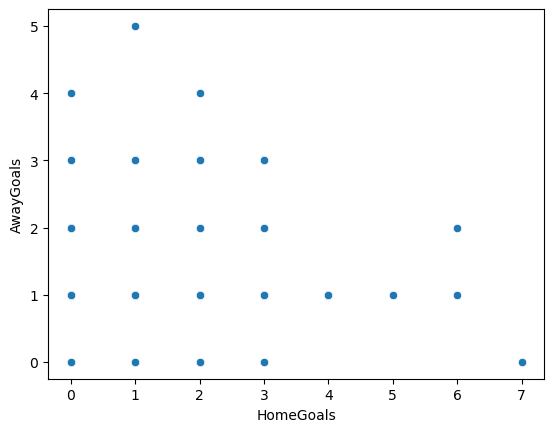

In [93]:
#scatterplot() most used chart
sns.scatterplot(x='HomeGoals',y='AwayGoals',data=df)
plt.show()

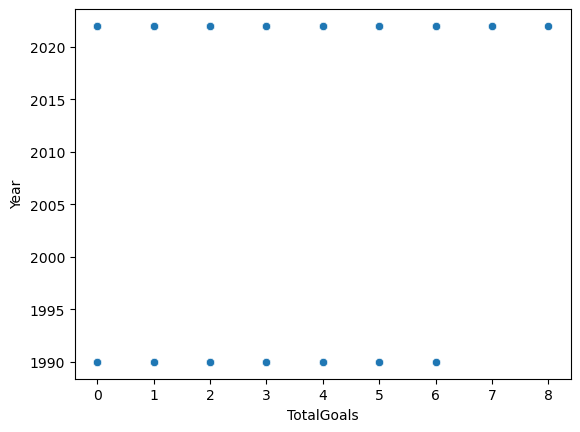

In [94]:
#scatterplot() most used chart
sns.scatterplot(x='TotalGoals',y='Year',data=df)
plt.show()

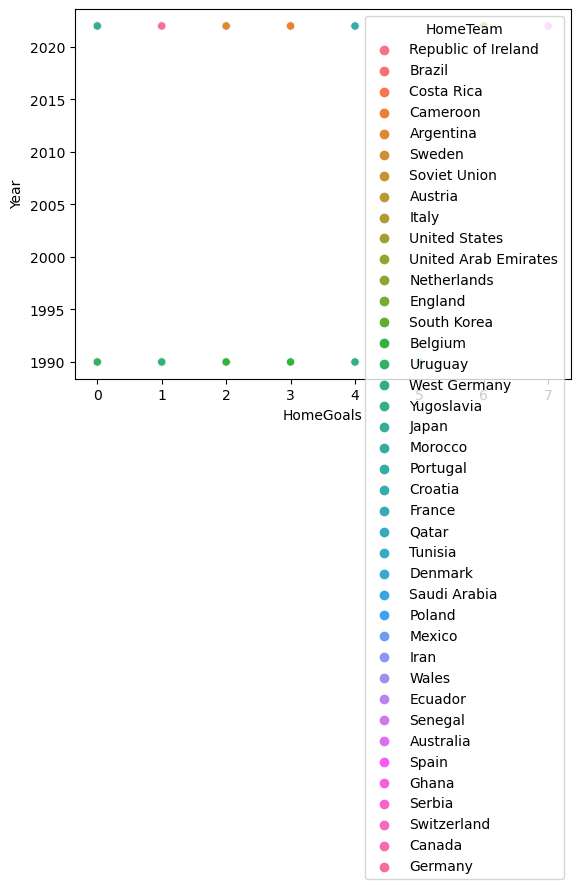

In [95]:
sns.scatterplot(x='HomeGoals',y='Year',data=df, hue='HomeTeam')
plt.show()

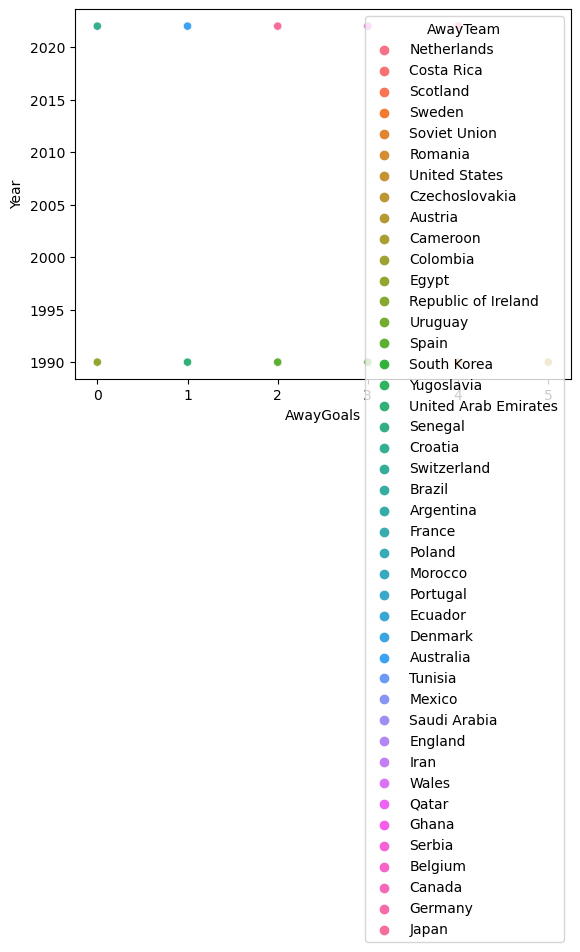

In [96]:
sns.scatterplot(x='AwayGoals',y='Year',data=df, hue='AwayTeam')
plt.show()

In [97]:
#Choosing ,Training,Testing The ML Model:

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [99]:
cat=['Year','HomeTeam','AwayTeam']
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(df[cat]),columns=encoder.get_feature_names_out(cat))

In [100]:
num=['Year','HomeGoals','AwayGoals']
scaler=StandardScaler()
scaled_cols = pd.DataFrame(scaler.fit_transform(df[num]),columns=num)

In [101]:
x=pd.concat([encoder_cols,scaled_cols],axis=1)
y=df['TotalGoals']

In [102]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
#different answer come due to random data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.1)

In [103]:
model=LinearRegression()

In [104]:
model.fit(x_train,y_train)

LinearRegression()

In [105]:
y_pred = model.predict(x_test)

In [106]:
r2 = r2_score(y_test, y_pred)

In [107]:
print('R2 Score: ',r2)

R2 Score:  0.9791239574801386


In [108]:
#Regression Metrics:

In [109]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse =np.sqrt(mse)

In [110]:
print('MAE: ',mae)
print('MSE: ',mse)
print('RMSE: ',rmse)

MAE:  0.2050765765578966
MSE:  0.062277616228386415
RMSE:  0.24955483611500381


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training set
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.45

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       1.00      0.50      0.67         8
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1

    accuracy                           0.45        20
   macro avg       0.35      0.31      0.32        20
weighted avg       0.61      0.45      0.49        20


Confusion Matrix:
[[1 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 1 4 3 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]]
